# **Exploratory Analysis**

* Our dependent variable is MRP(₹). This is the Maximum Retail Price of laptops and it is measured in Indian Currency - Rupee.
* The goal is to perform Exploratory Data Analysis to better understand the data.



In [1]:
# Import Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data

df = pd.read_csv('..\data\cleaned_data.csv')
df.head()

,MRP,RAM_Size,RAM_Type,Display,Processor,Storage,OS,Brand
0,36990,8,DDR4,14.0,Intel Core i3,256 GB SSD,Windows,Lenovo
1,39990,8,DDR4,15.6,Intel Core i3,512 GB SSD,Windows,Lenovo
2,32990,8,DDR4,15.6,Intel Core i3,512 GB SSD,Windows,ASUS
3,49990,8,DDR4,15.6,AMD Ryzen 5 Hexa Core,512 GB SSD,Windows,HP
4,49990,8,DDR4,15.6,Intel Core i5,512 GB SSD,Windows,ASUS


## **Descriptive Statistics**

In [3]:
df.shape

(423, 8)

In [4]:
df.describe()

,MRP,RAM_Size,Display
count,423.000000,423.000000,423.000000
mean,81546.262411,11.990544,15.052530
std,62526.140483,9.896139,1.026314
min,14990.000000,4.000000,11.600000
25%,41745.000000,8.000000,14.000000
50%,61497.000000,8.000000,15.600000
75%,94990.000000,16.000000,15.600000
max,434830.000000,128.000000,17.300000


There are outliers in the data

In [5]:
df.describe(include='object')

,RAM_Type,Processor,Storage,OS,Brand
count,423,423,423,423,423
unique,7,26,8,4,16
top,DDR4,Intel Core i5,512 GB SSD,Windows,ASUS
freq,321,110,232,394,136


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MRP        423 non-null    int64  
 1   RAM_Size   423 non-null    int64  
 2   RAM_Type   423 non-null    object 
 3   Display    423 non-null    float64
 4   Processor  423 non-null    object 
 5   Storage    423 non-null    object 
 6   OS         423 non-null    object 
 7   Brand      423 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 26.6+ KB


In [7]:
def cols (columns):
  num_cols, cat_cols = [],[]
  for i in columns:
    if df[i].dtype==object:
      cat_cols.append(i)
    else:
      num_cols.append(i)
  print(f'Categorical features : {cat_cols}')
  print(f'Numerical features : {num_cols}')
  return num_cols, cat_cols

num_cols, cat_cols = cols(df)

Categorical features : ['RAM_Type', 'Processor', 'Storage', 'OS', 'Brand']
Numerical features : ['MRP', 'RAM_Size', 'Display']


In [8]:
for column in cat_cols:
    print(f'{column} Unique Values\n')
    print(df[column].unique().tolist())
    print(df[column].nunique())
    print('\n')
    print('-'*100)
    print('\n')

RAM_Type Unique Values

['DDR4', 'DDR5', 'LPDDR4', 'Unified Memory', 'LPDDR4X', 'LPDDR5', 'LPDDR3']
7


----------------------------------------------------------------------------------------------------


Processor Unique Values

['Intel Core i3', 'AMD Ryzen 5 Hexa Core', 'Intel Core i5', 'AMD Ryzen 7 Quad Core', 'AMD Ryzen 5 Quad Core', 'AMD Ryzen 9 Octa Core', 'AMD Ryzen 7 Octa Core', 'M1', 'Intel Celeron Dual Core', 'AMD Ryzen 3 Dual Core', 'AMD Athlon Dual Core', 'Intel Evo Core i5', 'AMD Ryzen 3 Quad Core', 'M2', 'AMD Ryzen 5', 'Intel Celeron Quad Core', 'Intel Core i7', 'M1 Pro', 'Qualcomm Snapdragon 7c Gen 2', 'Intel Pentium Quad Core', 'AMD Ryzen 3', 'M1 Max', 'Intel Core i9', 'Intel Pentium Silver', 'AMD Ryzen 5 Dual Core', 'AMD Ryzen 3 Hexa Core']
26


----------------------------------------------------------------------------------------------------


Storage Unique Values

['256 GB SSD', '512 GB SSD', '256 GB SSD, 1 TB HDD', '128 GB SSD', '256 GB SSD, 256 HDD', '1 TB HDD

## **Univariate Analysis**

**MRP**

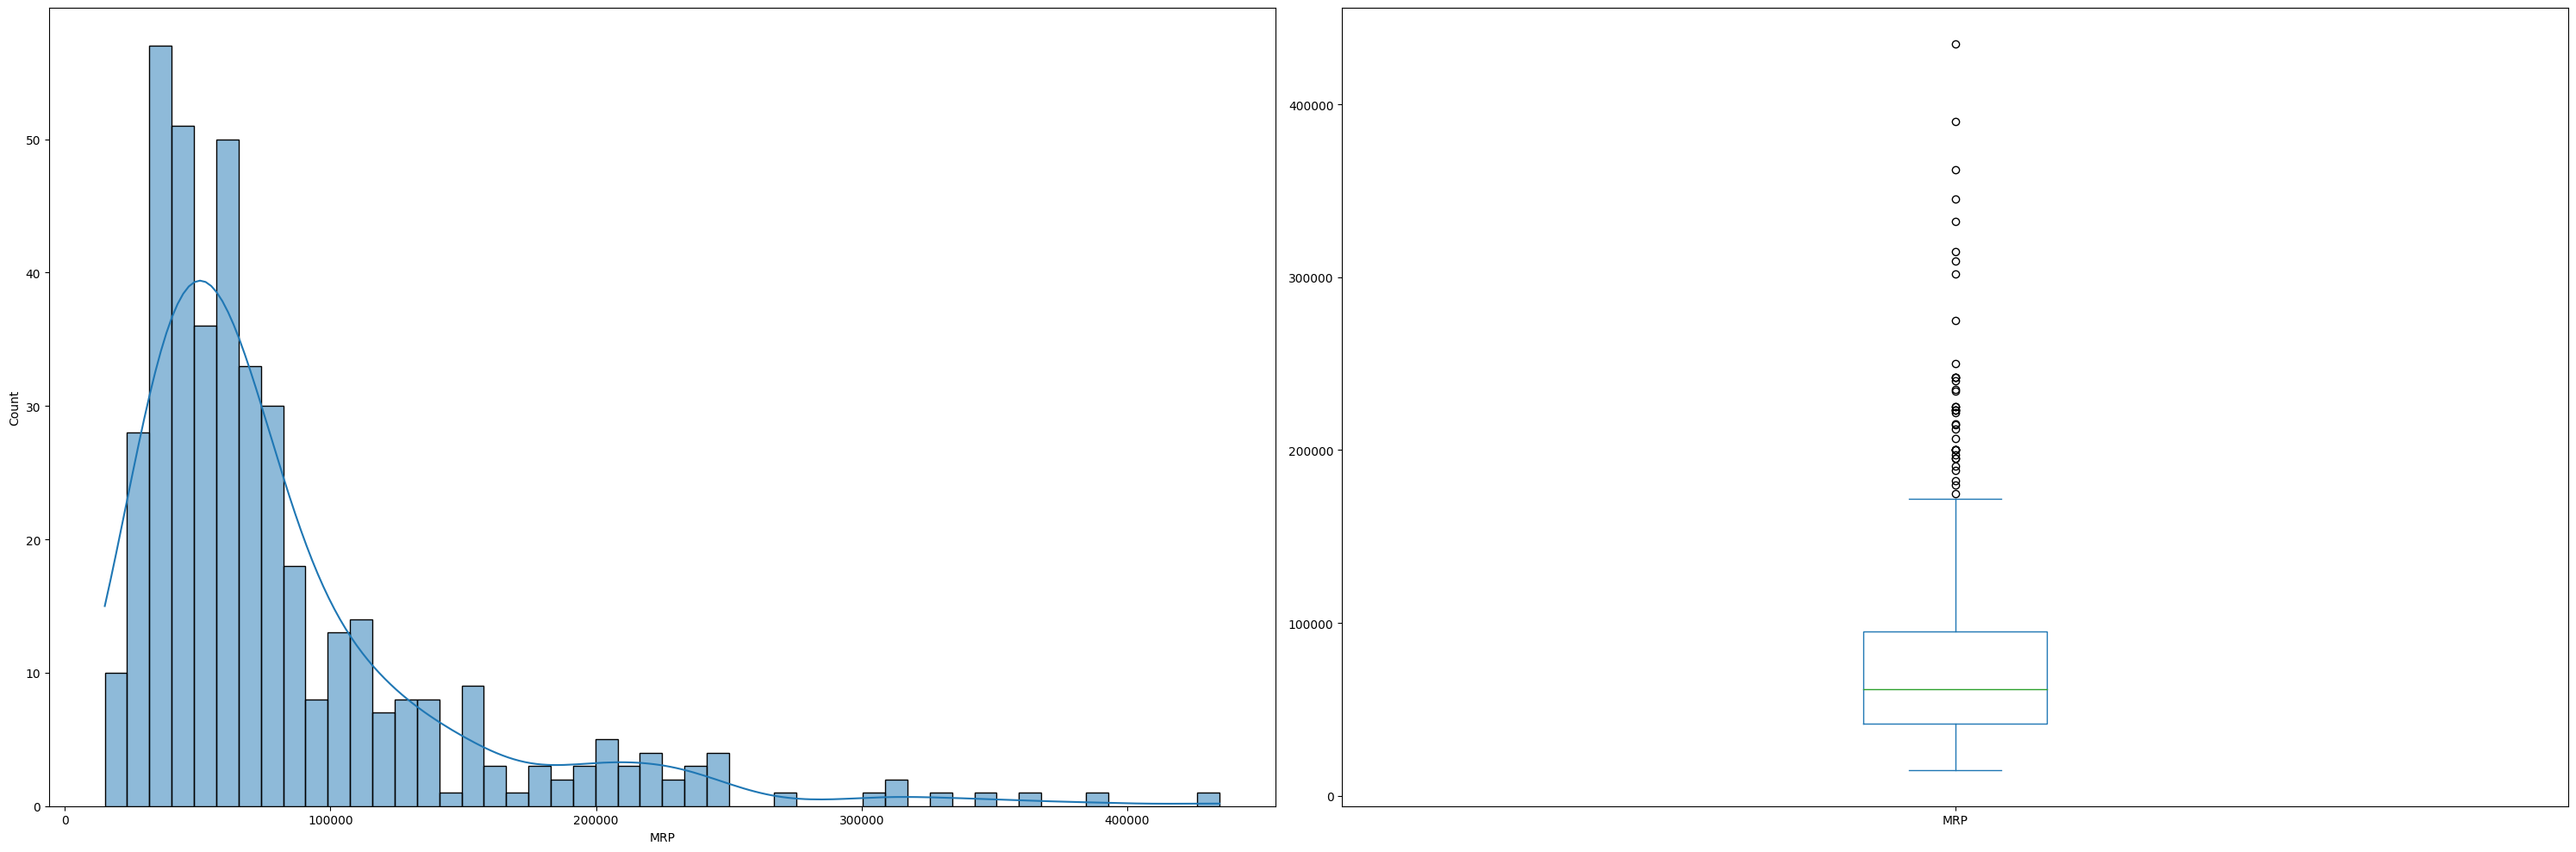

In [9]:
# Check the distribution of the target variable

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
sns.histplot(df['MRP'],kde=True,bins=50)
plt.subplot(1, 2, 2)
df['MRP'].plot(kind='box');
plt.tight_layout()

The target variable is not normally distributed. It is skewed to the right.

There are outliers present in the target variable.

**RAM_Size(GB)**

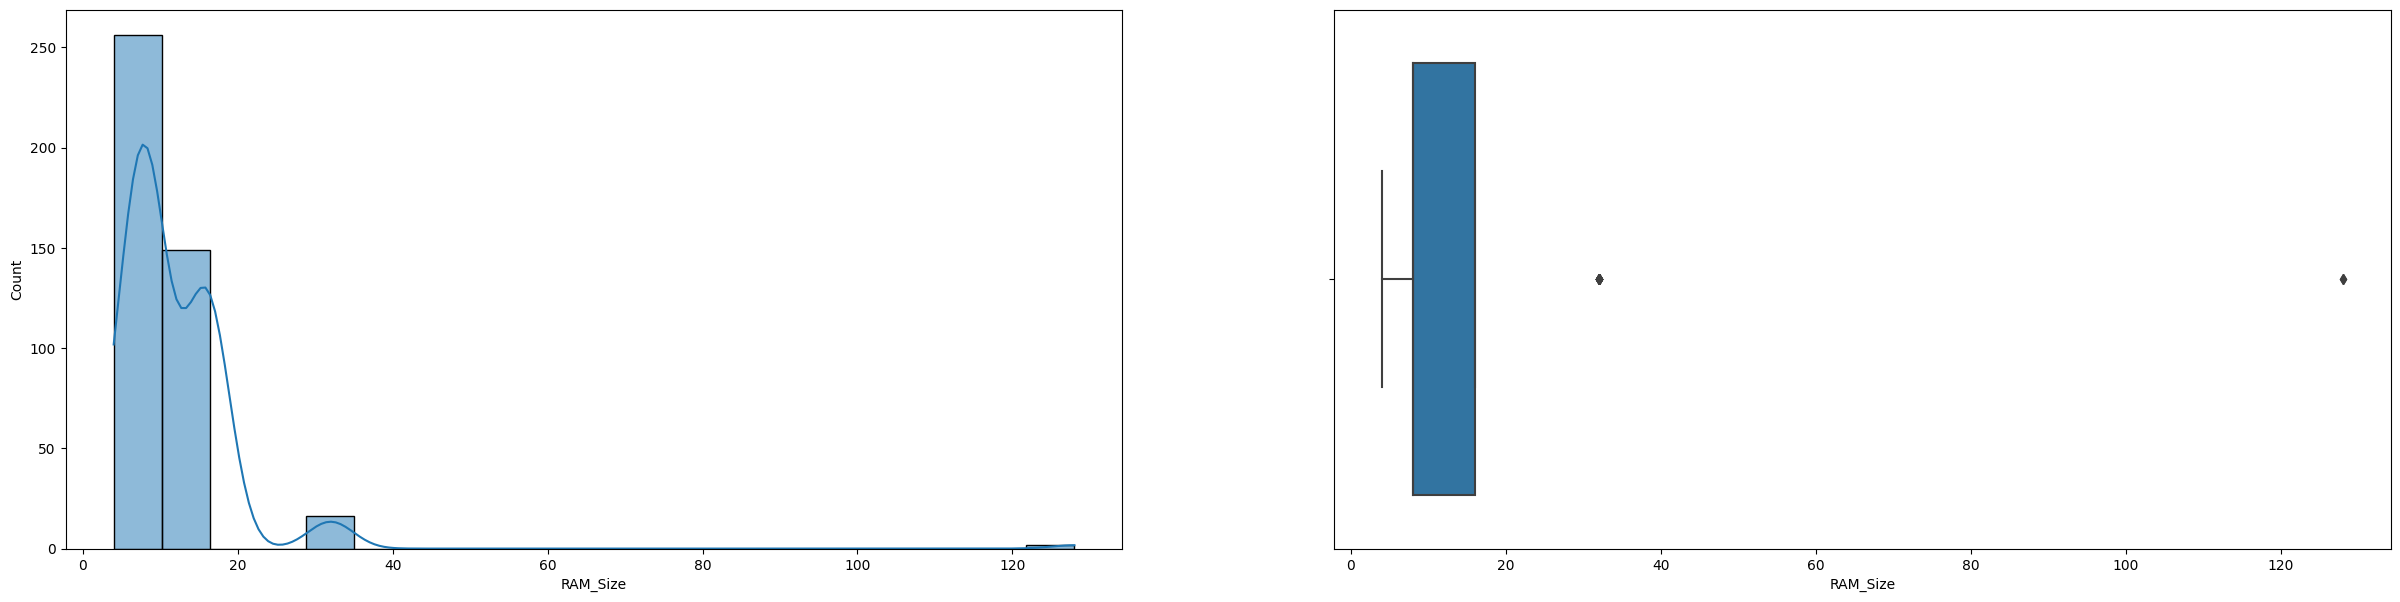

In [10]:
plt.figure(figsize=(30, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['RAM_Size'],kde=True,bins=20)
plt.subplot(1, 2, 2)
sns.boxplot(x='RAM_Size', data=df);

**Display**

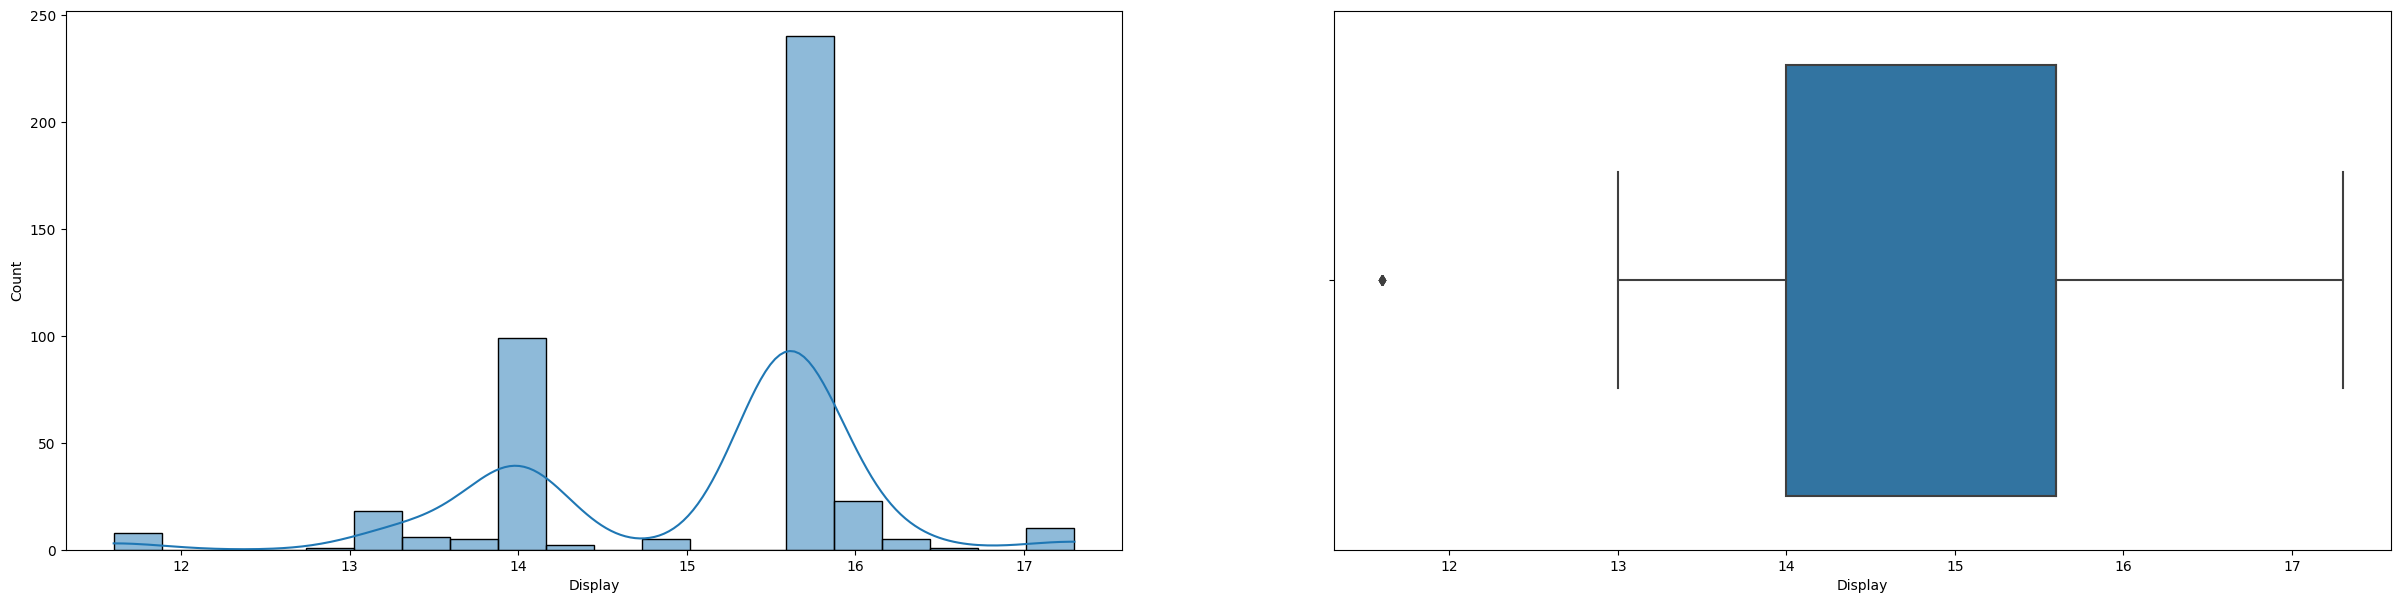

In [11]:
plt.figure(figsize=(30, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['Display'],kde=True,bins=20)
plt.subplot(1, 2, 2)
sns.boxplot(x='Display', data=df);

In [12]:
df.loc[(df['RAM_Size'] > df['RAM_Size'].quantile(0.99)) | (df['Display'] < df['Display'].quantile(0.01)) | (df['MRP'] > df['MRP'].quantile(0.99)) ]

,MRP,RAM_Size,RAM_Type,Display,Processor,Storage,OS,Brand
271,129999,128,DDR4,15.6,Intel Core i5,"128 GB SSD, 1 TB HDD",Windows,acer
287,389990,32,DDR5,17.3,Intel Core i9,256 GB SSD,Windows,MSI
355,331990,32,DDR5,16.0,Intel Core i9,256 GB SSD,Windows,ASUS
363,361990,32,DDR5,16.0,AMD Ryzen 9 Octa Core,256 GB SSD,Windows,ASUS
370,434830,32,DDR4,17.3,Intel Core i9,128 GB SSD,Windows,DELL
371,345390,32,DDR4,15.6,Intel Core i9,128 GB SSD,Windows,ALIENWARE
381,74590,128,DDR4,15.6,Intel Core i5,"128 GB SSD, 1 TB HDD",Windows,acer


The two observations that have 128 RAM have similar features except price. Other features such as weight and resolution could be the reason for the difference.

The laptops with high prices have advanced processors and larger display sizes (inches).

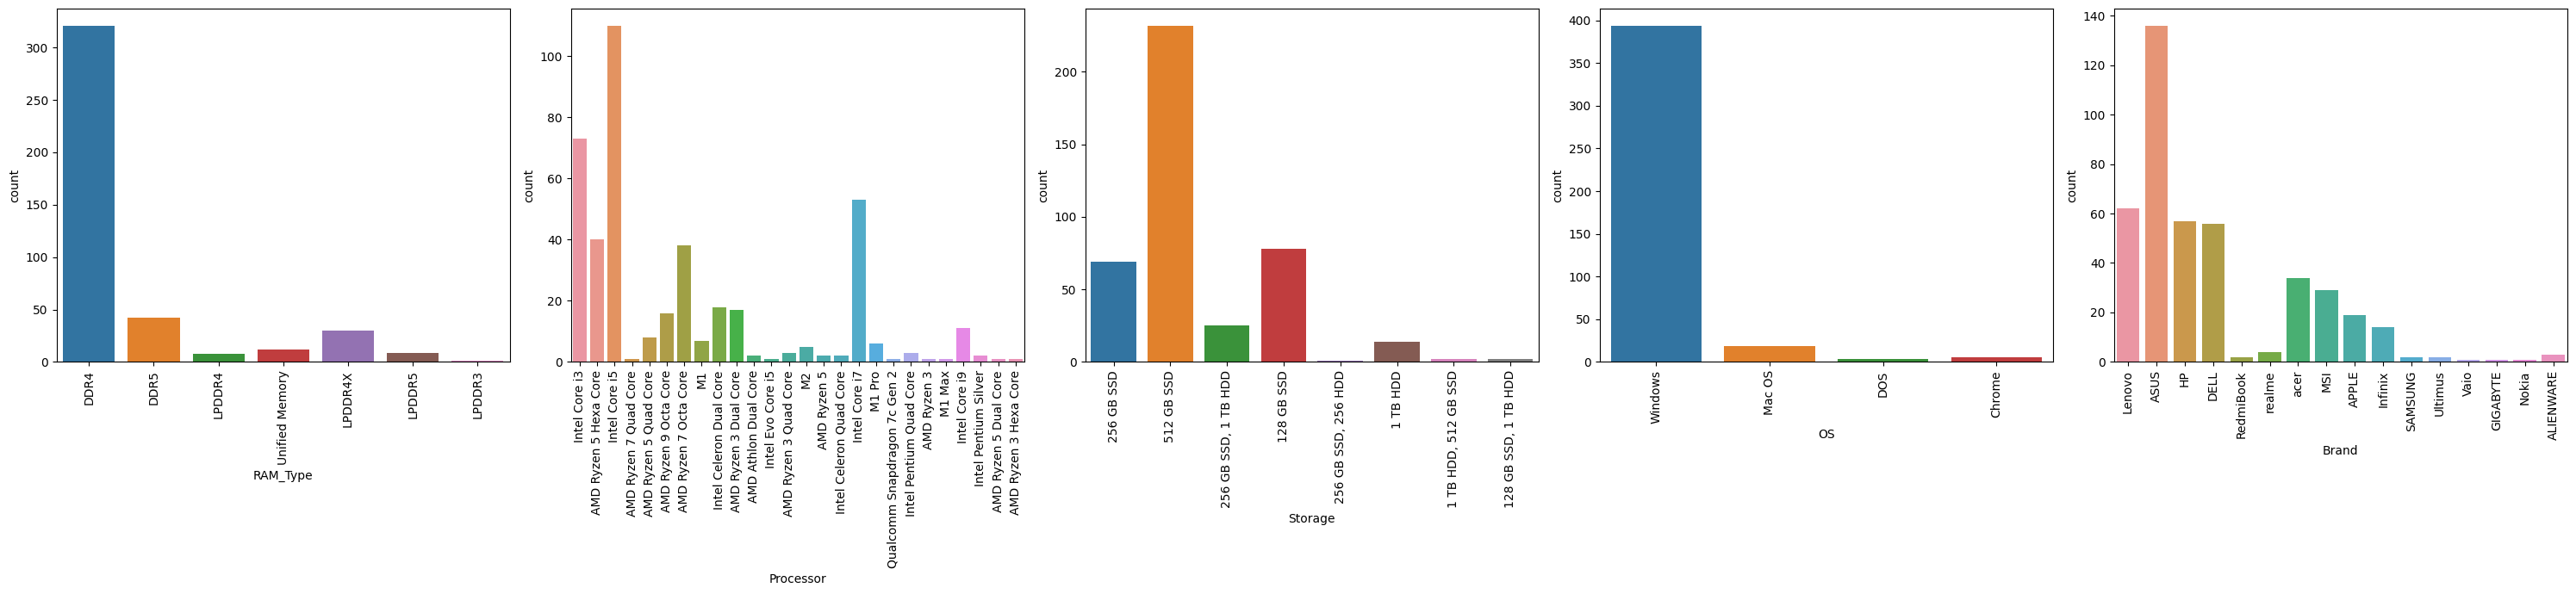

In [13]:
# Plot categorical columns

fig, axs = plt.subplots(ncols=len(cat_cols), figsize=(30, 7))

for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


**Observations**
1. The most popular RAM_Type is DDR4.
2. Intel Core i5 is the most common processor.
3. 512 GB SSD is the most used storage in laptops.
4. The observations have Windows as their Operation System.
5. The most common brand is ASUS.



## **Multivariate Analysis**

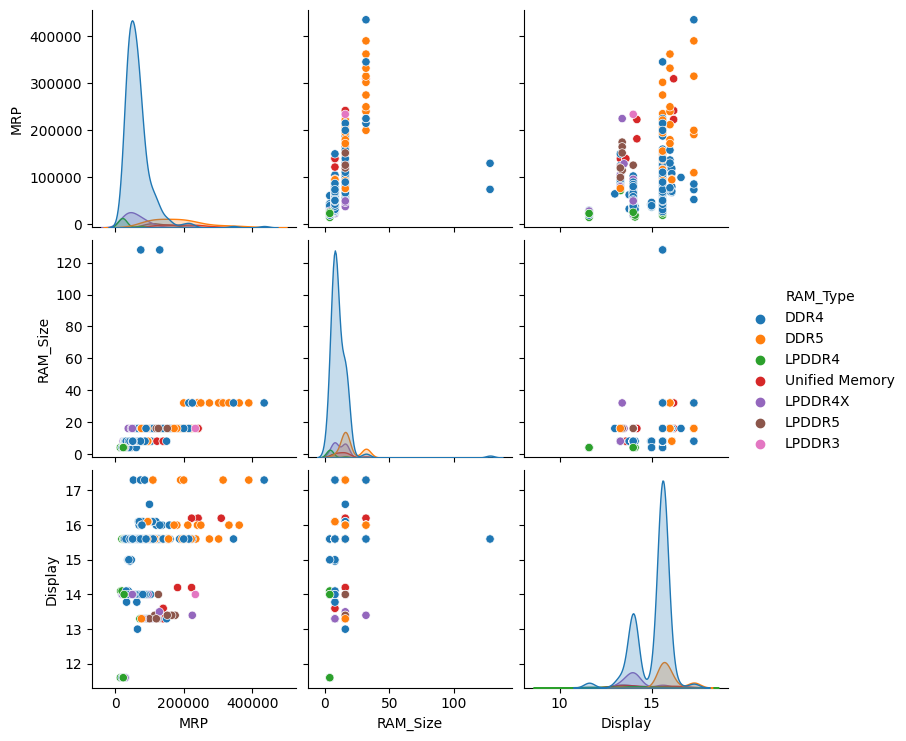

In [14]:
sns.pairplot(df, hue='RAM_Type');

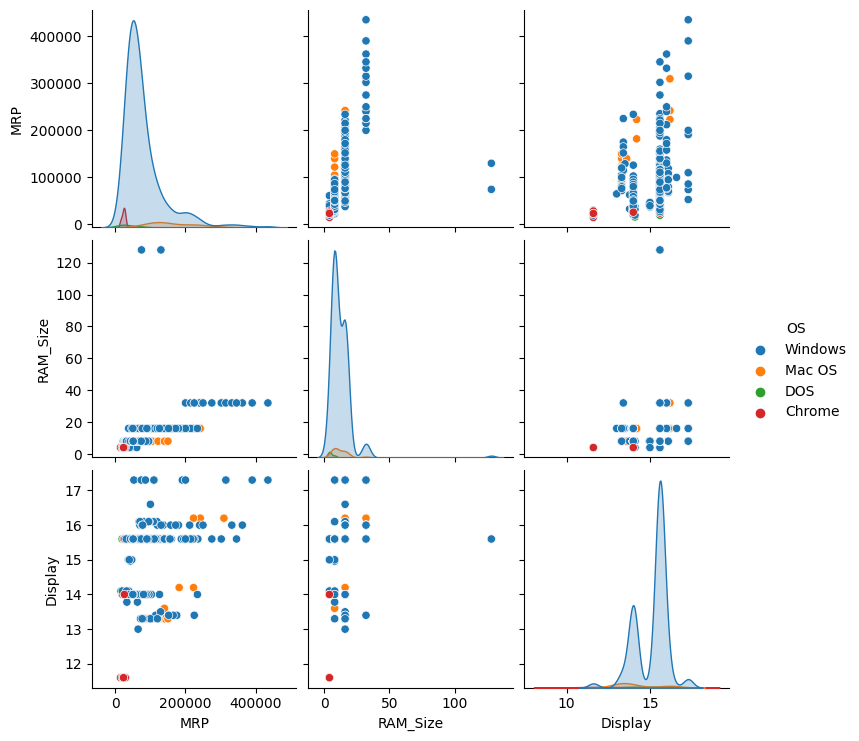

In [15]:
sns.pairplot(df, hue='OS');

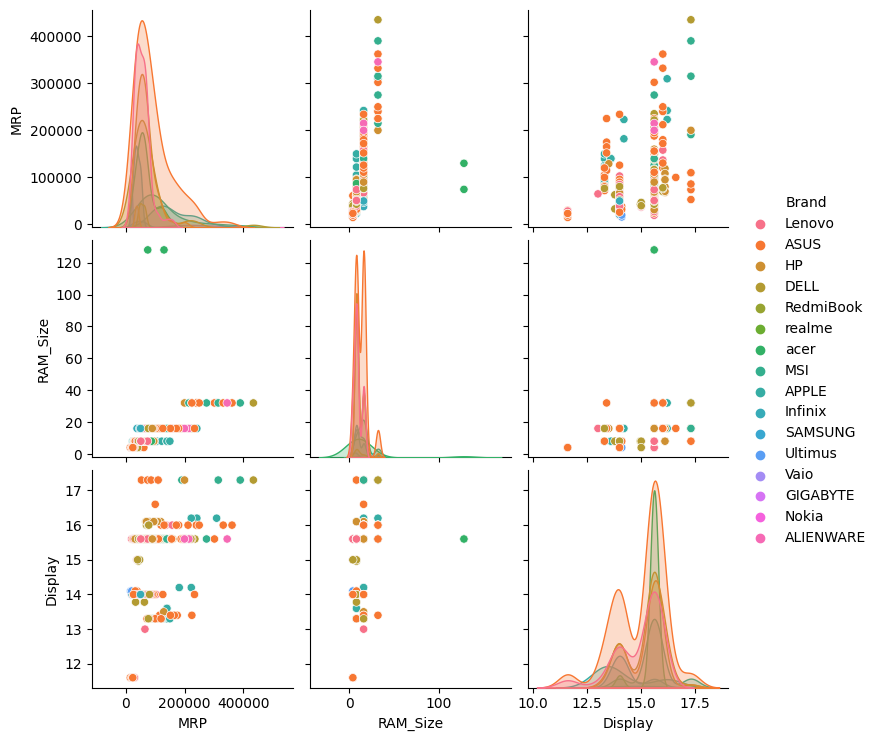

In [16]:
sns.pairplot(df, hue='Brand');

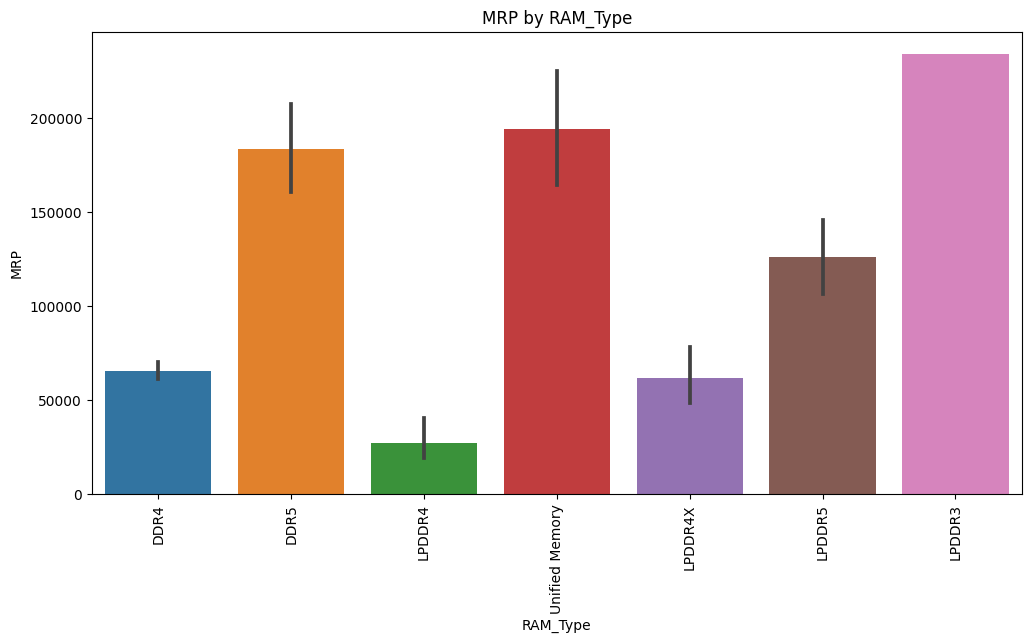

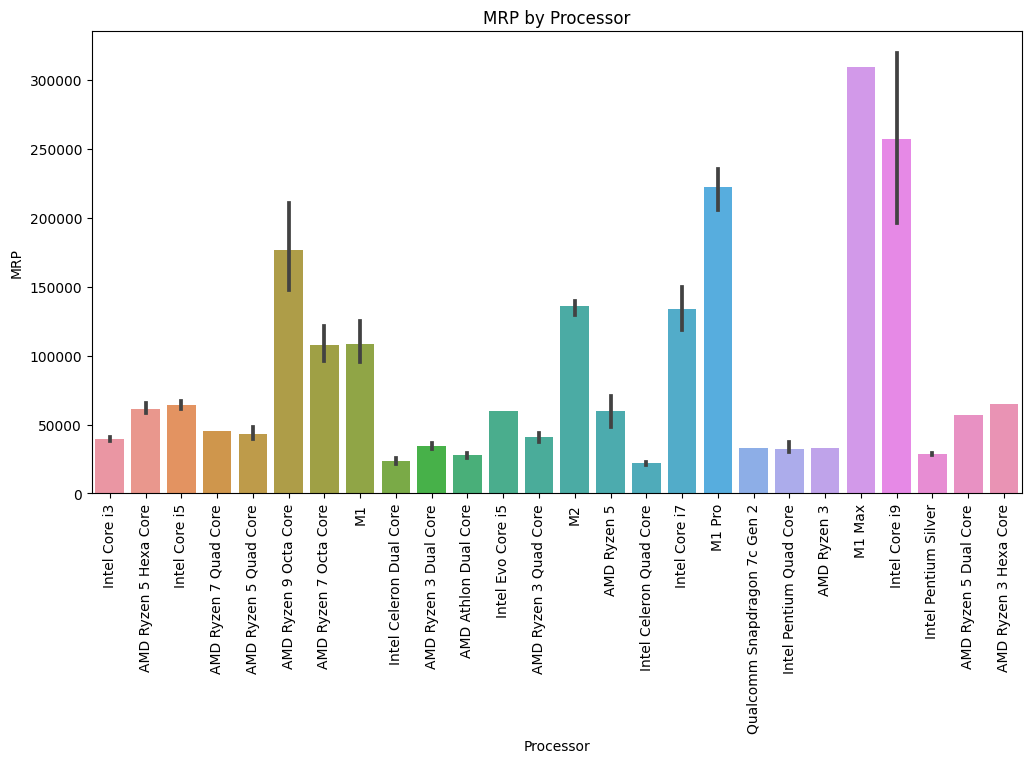

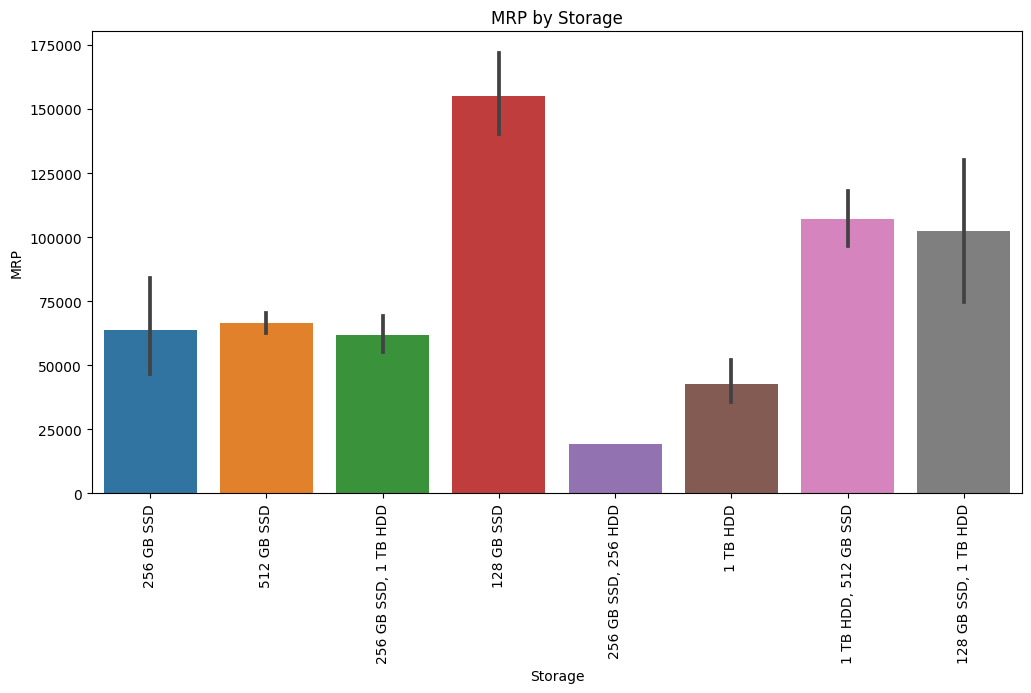

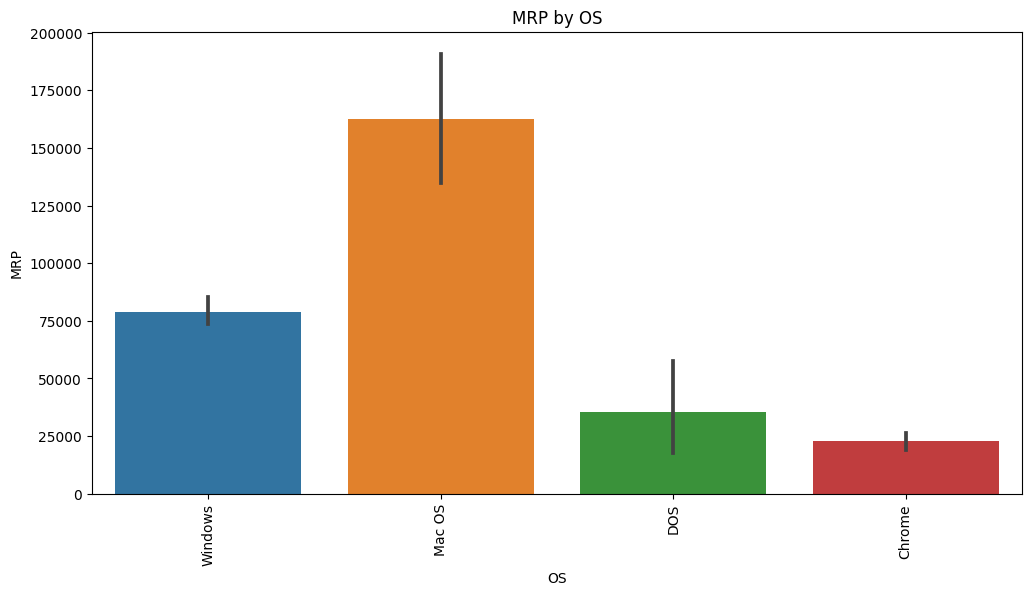

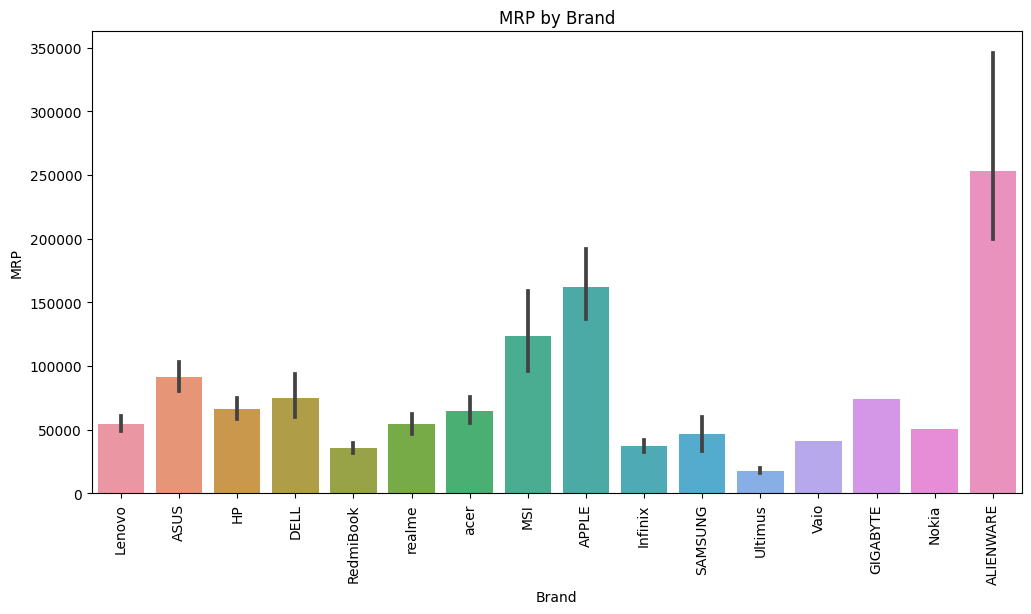

In [17]:
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x=col, y='MRP')
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel('MRP')
    plt.title(f'MRP by {col}')
    plt.show()

**Correlation**

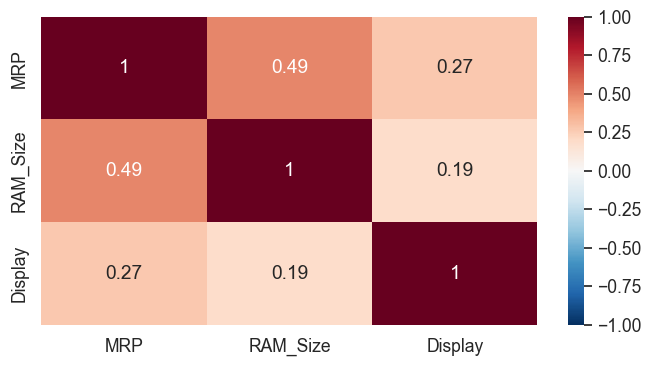

In [18]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df[num_cols].corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

In [19]:
# Replace 128 GB RAM Size with the median

median= df['RAM_Size'].median()
df.loc[df['RAM_Size'] == 128,'RAM_Size'] = median

In [20]:
df[num_cols].corr()

,MRP,RAM_Size,Display
MRP,1.000000,0.802721,0.269127
RAM_Size,0.802721,1.000000,0.264546
Display,0.269127,0.264546,1.000000


The correlation between RAM Size and MRP has drastically improved after removing the outliers in RAM Size. Its correlation with Display has also increased.

In [21]:
# Removing outliers from MRP

def detect_outliers_mean(data, threshold=3):
    mean = data.mean()
    std = data.std()
    upper_threshold = mean + (threshold * std)
    lower_threshold = mean - (threshold * std)
    
    return (data > upper_threshold) | (data < lower_threshold)

outliers_MRP = detect_outliers_mean(df['MRP'])

print("Number of outliers detected using mean and standard deviation:", outliers_MRP.sum())
sorted_df = df.sort_values('MRP', ascending=False)

# Select the tenth row (index 9)
tenth_expensive_price = sorted_df.iloc[9]['MRP']
print(tenth_expensive_price)

Number of outliers detected using mean and standard deviation: 9
249990


In [22]:
df_copy = df.copy()
df_copy.loc[df_copy['MRP'] > tenth_expensive_price, 'MRP'] = tenth_expensive_price

In [23]:
df_copy[num_cols].corr()

,MRP,RAM_Size,Display
MRP,1.000000,0.787236,0.254265
RAM_Size,0.787236,1.000000,0.264546
Display,0.254265,0.264546,1.000000


Removing the outliers in MRP reduces the correlation with other variables. 

In [24]:
grouped_df = df[df['Display'] == 11.60].groupby(['Brand', 'MRP']).size().reset_index(name='Count')
grouped_df

,Brand,MRP,Count
0,ASUS,14990,1
1,ASUS,19990,1
2,ASUS,21990,1
3,ASUS,23490,1
4,ASUS,29980,1
5,Lenovo,23250,1
6,Lenovo,26490,1
7,Lenovo,28490,1


In [25]:
df_copy1 = df.copy()

# Replace the outlier with the median

median= df_copy1['Display'].median()
df_copy1.loc[df_copy1['Display'] == 11.60,'Display'] = median

df_copy1[num_cols].corr()

,MRP,RAM_Size,Display
MRP,1.000000,0.802721,0.226389
RAM_Size,0.802721,1.000000,0.192219
Display,0.226389,0.192219,1.000000


The inch size is particular to the brand. Removing it will cause inaccuracies.

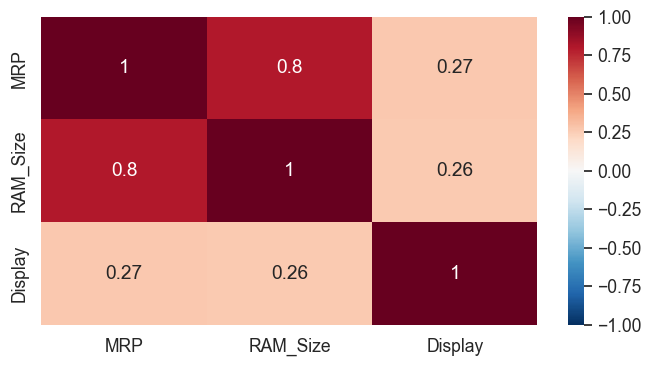

In [26]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df[num_cols].corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

In [27]:
df.to_csv('../data/cleaned_data2.csv',index = False)